## Problem Statement And Our Goal
- Problem Statement: This dataset is a record of 7 common different fish species in fish market sales. We have to creat a Regression model to estimate the weight of fish.
- Our Goal: Creating Multivariate Linear Regression model to estimate the weight of fish.

In [1]:
# import all libraries and dependencies for dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [2]:
# Reading the Fish CSV file
df_fish = pd.read_csv('Fish.csv')

In [3]:
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df_fish.shape

(159, 7)

In [5]:
# type of the data
df_fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [6]:
# description of the data
df_fish.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


There are outlier in weight variable. Since the weight of any fish cann't be zero. And difference between 75% percentile and max is very high. So, We also need to check if there are any outlies(Its may be True Outlier).

In [7]:
# Checking the null values
df_fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There is no null value in fish dataset.

In [8]:
# Information of the data set
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Visualization of The Data

In [9]:
# Counting the all 7 fish  individually in the data set
df_fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### Visualizing the different fish names available

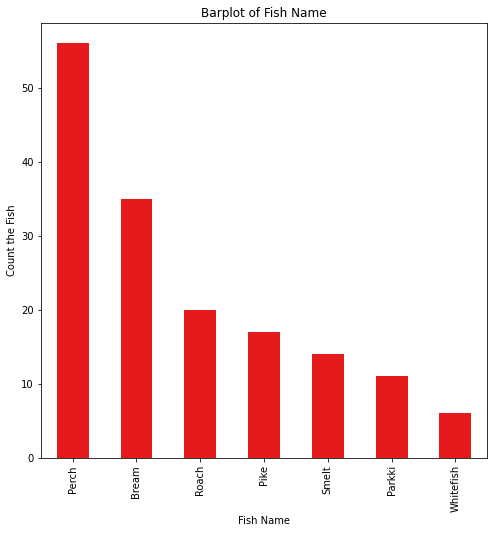

In [10]:
plt.figure(figsize = (8, 8))
ax = df_fish['Species'].value_counts().plot(kind = 'bar', stacked=True, colormap = 'Set1')
plt.title('Barplot of Fish Name')
plt.xlabel('Fish Name')
plt.ylabel('Count the Fish')
plt.show()

In [11]:
# checking for duplicates
df_fish.duplicated().sum()

0

There is no duplicate variables.

In [12]:
df_fish[df_fish['Weight'] == df_fish['Weight'].max()]

,Species,Weight,Length1,Length2,Length3,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.48


In [13]:
df_fish[df_fish['Weight'] == df_fish['Weight'].min()]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


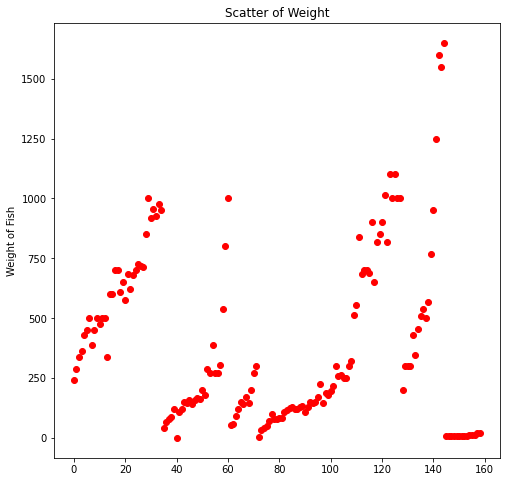

In [14]:
# Scatter plot of weight variable
plt.figure(figsize = (8, 8))
plt.scatter(x = np.arange(len(df_fish)), y = df_fish['Weight'], c = 'red')
plt.title('Scatter of Weight')
plt.ylabel('Weight of Fish')
plt.show()

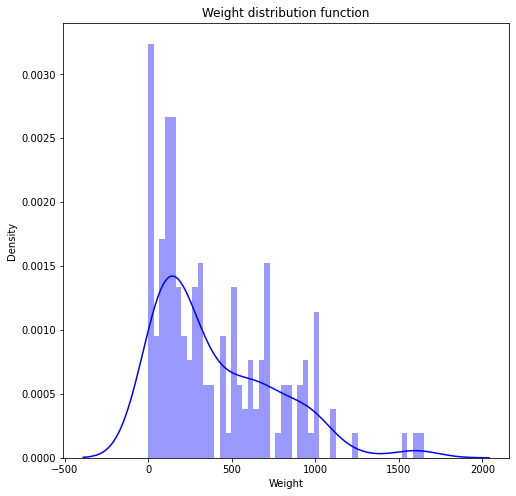

In [15]:
# distribution plot of weight variable
plt.figure(figsize=(8,8))
sns.distplot(df_fish['Weight'], bins=50, kde=True, color = 'blue')
plt.title('Weight distribution function')
plt.show()

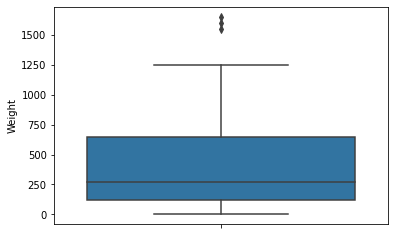

In [16]:
# Boxplot of weight varible
sns.boxplot(y = 'Weight', data = df_fish)
plt.show()

In [17]:
df_fish[df_fish['Species'] == 'Pike']

,Species,Weight,Length1,Length2,Length3,Height,Width
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756
129,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
132,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
134,Pike,456.0,40.0,42.5,45.5,7.2800,4.3225
135,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
136,Pike,540.0,40.1,43.0,45.8,7.7860,5.1296
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960


There is some typo in row 142 or 143. So, I will delete row 142 and keep the row 143. Thus, we will delete row 40, 142 and 144.

In [18]:
df_fish.drop([40, 142, 144], inplace = True)

<Figure size 1080x1080 with 0 Axes>

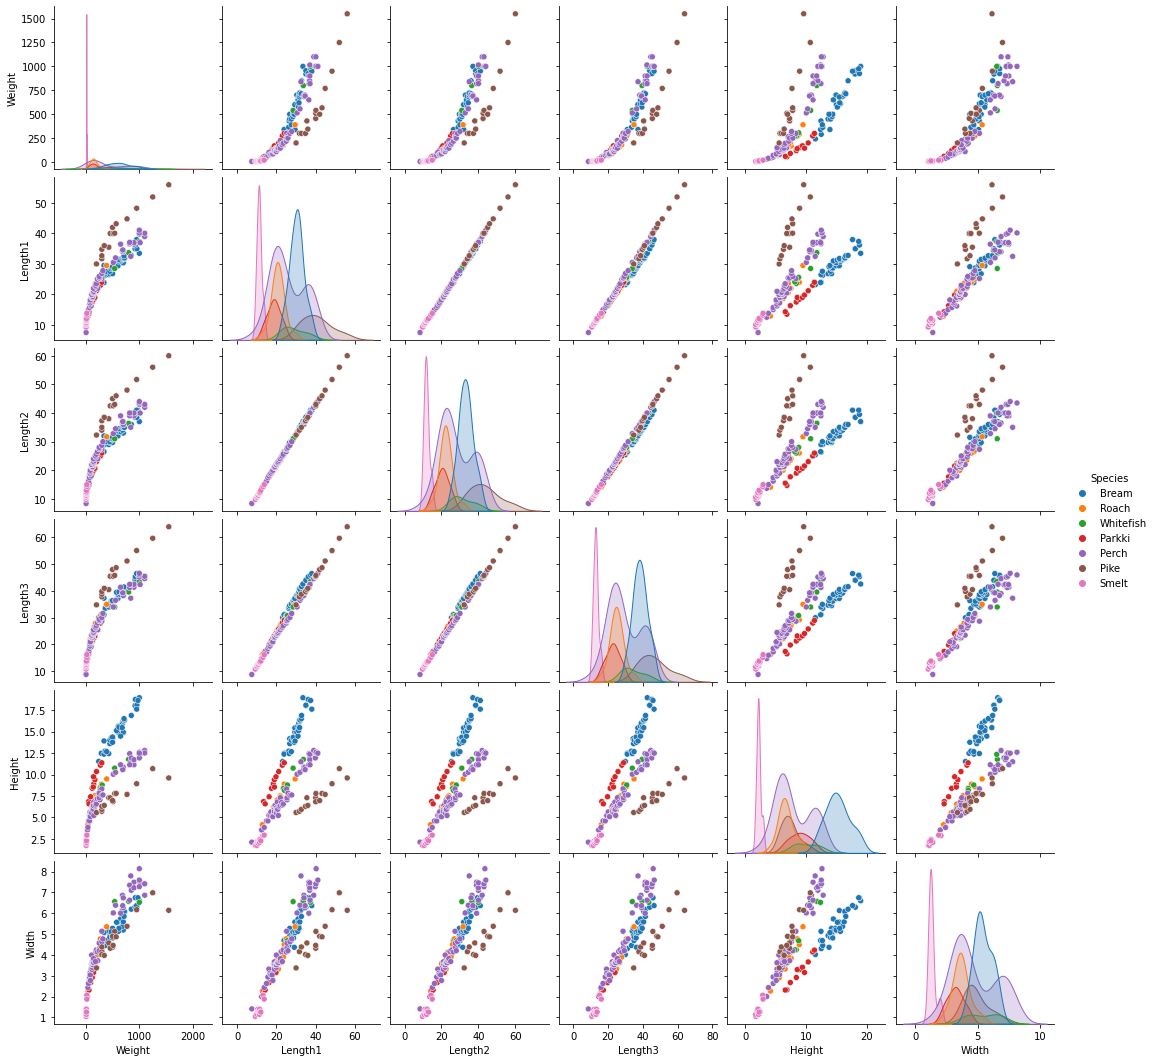

In [19]:
# Pairplot of dataset
plt.figure(figsize=(15, 15))
sns.pairplot(df_fish, hue="Species")
plt.show()

In [20]:
# Columns of the data set
df_fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

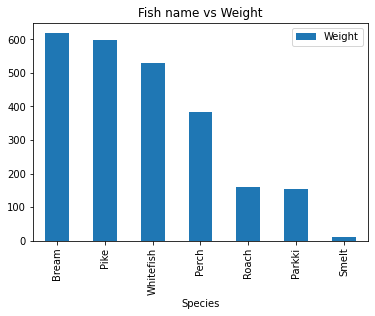

In [21]:
# The bar plot of fish and their corresponding mean weight
plt.figure(figsize=(10, 6))
df_fishx = pd.DataFrame(df_fish.groupby(['Species'])['Weight'].mean().sort_values(ascending = False))
df_fishx.plot.bar()
plt.title('Fish name vs Weight')
plt.show()

In [22]:
del df_fish['Species']

Deleting the Species varible from the data set.

In [23]:
df_fish.shape

(156, 6)

In [24]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_fish, train_size = 0.8, test_size = 0.2, random_state = 100)

In [25]:
sig_col = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [26]:
# standardization of the data set
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
df_fish[sig_col] = scaler.fit_transform(df_fish[sig_col])

In [27]:
df_fish.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.433000,-0.286749,-0.261979,-0.076133,0.591907,-0.223628
1,-0.287813,-0.201564,-0.172660,0.033246,0.814844,-0.052684
2,-0.136576,-0.212212,-0.152811,0.024131,0.791111,0.181049
3,-0.067008,0.043343,0.095300,0.242889,0.872901,0.037039
4,0.135650,0.064640,0.095300,0.288463,0.806484,0.443152


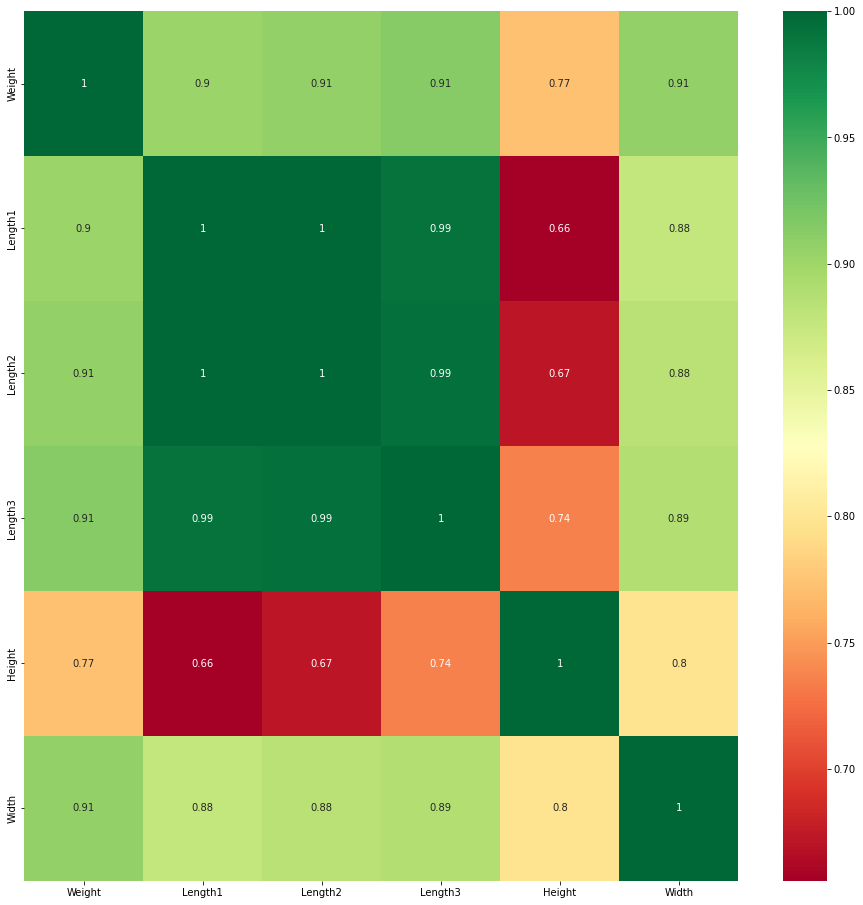

In [28]:
# Heat map of the data set
plt.figure(figsize = (16, 16))
sns.heatmap(df_fish.corr(), cmap="RdYlGn", annot=True)
plt.show()

In [29]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('Weight')
X_train = df_train

## Building a Linear Model

In [30]:
X_train_1 = X_train['Length1']

In [31]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [32]:
# Check parameters created

lr_1.params

const     -407.736194
Length1     30.281290
dtype: float64

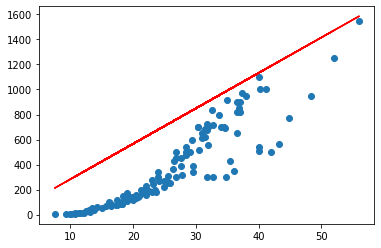

In [33]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 30.281290*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [34]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     595.9
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           8.84e-49
Time:                        18:16:57   Log-Likelihood:                -781.48
No. Observations:                 124   AIC:                             1567.
Df Residuals:                     122   BIC:                             1573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -407.7362     34.048    -11.975      0.0

### Adding another variable

The R-squared value obtained is `0.83`. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. Width

In [35]:
X_train_2 = X_train[['Length1', 'Width']]

In [36]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [37]:
lr_2.params

const     -445.069344
Length1     17.630517
Width       83.859679
dtype: float64

In [38]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     423.8
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           2.23e-55
Time:                        18:16:57   Log-Likelihood:                -762.40
No. Observations:                 124   AIC:                             1531.
Df Residuals:                     121   BIC:                             1539.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -445.0693     29.854    -14.908      0.0

### Adding another variable

The R-squared value obtained is `0.875`. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. Height.

In [39]:
X_train_3 = X_train[['Length1', 'Height', 'Width']]

In [40]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [41]:
lr_3.params

const     -454.606960
Length1     18.795998
Height      13.143591
Width       52.526097
dtype: float64

In [42]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     310.1
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           2.46e-56
Time:                        18:16:57   Log-Likelihood:                -756.86
No. Observations:                 124   AIC:                             1522.
Df Residuals:                     120   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -454.6070     28.810    -15.780      0.0

In [43]:
# Predicting the price of training set.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train_3, y_train)
y_pred = reg.predict(X_train_3)

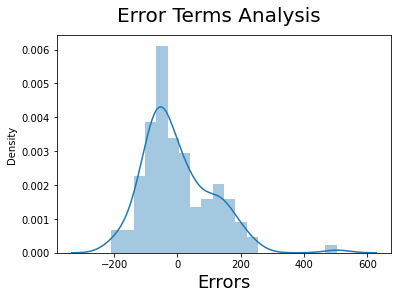

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)
plt.show()

$Fish.weight = -454.6070 + 18.7960*Length1 + 13.1436*Height + 52.5261*Width$

## Dividing test set into X_test and y_test

In [45]:
y_test = df_test.pop('Weight')
X_test = df_test

In [46]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_3.columns]

In [47]:
# Making predictions using the final model
y_pred = reg.predict(X_test_new)

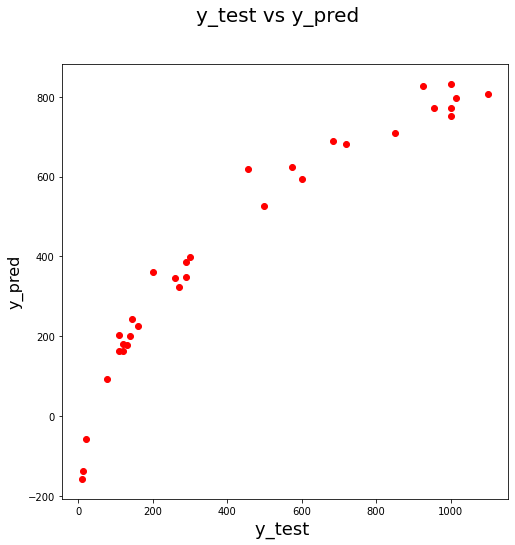

In [48]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = (8, 8))
plt.scatter(y_test,y_pred, color = 'red')
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [49]:
# RMSE Score
r2_score(y_test, y_pred)

0.8754028339389535

**The R2 score of Training set is 0.875 and Test set is 0.875 which is quite close.
Hence, We can say that our model is good enough to predict the Fish Weight using below predictor variables**
- Length1
- Hight
- Weight

## VISUALISATION OF THE PREDICTIONS:

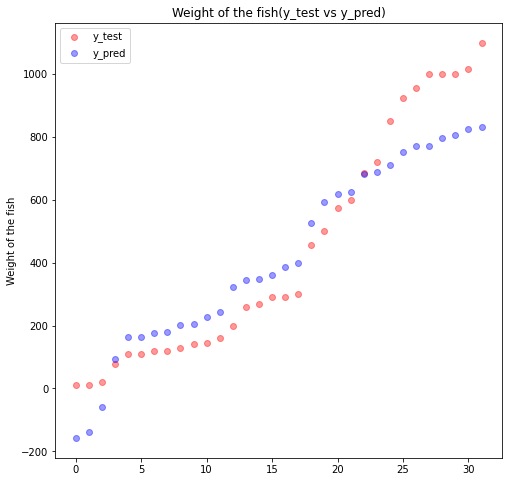

In [50]:
# Scatter plot  of weight of the fish(y_test vs y_pred)
plt.figure(figsize = (8, 8))
plt.scatter(x = range(len(y_test)), y = y_test.sort_values(ascending=True), color='red', alpha=0.4, label ='y_test')
plt.scatter(x = range(len(y_pred)), y = pd.Series(y_pred, index = y_test.index).sort_values(ascending=True),
            color='blue', alpha=0.4, label ='y_pred')
plt.ylabel('Weight of the fish')
plt.legend()
plt.title('Weight of the fish(y_test vs y_pred)')
plt.show()

In [51]:
# COMPARING REAL AND PREDICTED WEIGHTS
df = pd.concat([y_test, pd.Series(y_pred, index = y_test.index)], axis=1, ignore_index=True)
df.reset_index(drop=True, inplace=True)
df.rename(columns = {0:'y_test', 1:'y_pred'}, inplace = True)
df

,y_test,y_pred
0,140.0,200.848802
1,500.0,526.622147
2,1100.0,807.447820
3,600.0,594.001775
4,200.0,359.763602
5,685.0,688.011533
6,456.0,619.962376
7,290.0,386.685383
8,300.0,398.288629
9,290.0,349.369386
